***
# **Passenger Satisfaction**

***
## **Contents**

1. Business Understanding
2. Data Understanding
3. EDA & Data Preprocessing
4. Modelling
5. Conclusion & Recommendation

***
### **Business Understanding**

##### **About**

Airline businesses around the world take a huge hit when Covid-19 arises, due to transportation limitation. However, after then storm ends, demand for air travel is more than likely to spike from people that's been stuck overseas for holiday. What can airlines do to prepare for the upcoming wave to put themselves ahead in the competition? We'll answer this question by building **classification model** from airline passanger satisfaction survey data to discover the key elements that can lead to customer satisfaction.

##### **Metrics**
We'll be using **recall** as our main metrics for this project, as it might be especially beneficial to hear feedbacks from not-satisfied customers, but hearing feedbacks from some satisfied customer wouldn't hurt.

***
### **Data Undestanding**

Dataset taken from: [Kaggle: Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

**Dataset Info:**
|**Feature**|**Description**|**Data Type**|
| --- | --- | --- |
| Gender | Gender of the passengers (Female, Male) | object
| Customer Type | The customer type (Loyal customer, disloyal customer) | object
| Age | The actual age of the passengers | int64
| Type of Travel | Purpose of the flight of the passengers (Personal Travel, Business Travel) | object
| Class | Travel class in the plane of the passengers (Business, Eco, Eco Plus) | object
| Flight distance | The flight distance of this journey |int64
| Inflight wifi service | Satisfaction level of the inflight wifi service (0: Not Applicable;1-5) | int64
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient | int64
| Ease of Online booking | Satisfaction level of online booking | int64
| Gate location | Satisfaction level of Gate location | int64
| Food and drink | Satisfaction level of Food and drink | int64
| Online boarding | Satisfaction level of online boarding | int64
| Seat comfort | Satisfaction level of Seat comfort | int64
| Inflight entertainment | Satisfaction level of inflight entertainment | int64
| On-board service | Satisfaction level of On-board service | int64
| Leg room service | Satisfaction level of Leg room service | int64
| Baggage handling | Satisfaction level of baggage handling | int64
| Check-in service | Satisfaction level of Check-in service | int64
| Inflight service | Satisfaction level of inflight service | int64
| Cleanliness | Satisfaction level of Cleanliness | int64
| Departure Delay in Minutes | Minutes delayed when departure | int64
| Arrival Delay in Minutes | Minutes delayed when Arrival | float64
| Satisfaction | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) | object

In [2]:
# Import Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.offline as py
import plotly.io as pio
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as XGB
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')
pio.renderers.default = 'plotly_mimetype+notebook'
py.init_notebook_mode(connected=True)

In [3]:
# Load both dataset
df_train = pd.read_csv(r"train.csv")
df_test = pd.read_csv(r"test.csv")
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
# Merging Train and Test data for EDA, we'll split it again later at modelling stage
df = pd.concat([df_train, df_test])
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


***
### **Exploratory Data Analysis & Data Preprocessing**

In [5]:
# Checking for missing value
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Dropping rows with missing value
df.drop(df[df["Arrival Delay in Minutes"].isna() == True].index, inplace=True)

# Dropping column "id" and "Unnamed: 0" since it's basically just index
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# Dropping duplicate index that we got as a result from merging train and test set
df.reset_index(drop=True, inplace=True)

In [8]:
# Putting "Class" into number based on its ordinal value
df["Class"][df["Class"] == "Business"] = 3
df["Class"][df["Class"] == "Eco Plus"] = 2
df["Class"][df["Class"] == "Eco"] = 1

# Changing "Class" data type to int
df["Class"] = df["Class"].astype("int64")

# Changing "Satisfaction" to boolean for modelling.
# Class 0 = Satisfied
# Class 1 = NOT satisfied (our focus class will be passengers that are not satisfied) 
df["satisfaction"] = df["satisfaction"].apply(lambda x: 0 if x == "satisfied" else 1)

# Renaming "satisfaction" to "not satisfied" to avoid confusion
df.rename(columns={"satisfaction":"not satisfied"}, inplace=True)

In [9]:
# Checking for multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [10]:
# Original multicol value
calc_vif(df[["Age","Flight Distance", "Inflight wifi service",
       "Departure/Arrival time convenient", "Ease of Online booking",
       "Gate location", "Food and drink", "Online boarding", "Seat comfort",
       "Inflight entertainment", "On-board service", "Leg room service",
       "Baggage handling", "Checkin service", "Inflight service",
       "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Class"]])

,variables,VIF
0,Age,7.308728
1,Flight Distance,3.101019
2,Inflight wifi service,12.651572
3,Departure/Arrival time convenient,7.352093
4,Ease of Online booking,12.998448
5,Gate location,8.889201
6,Food and drink,13.715631
7,Online boarding,13.182465
8,Seat comfort,18.558689
9,Inflight entertainment,26.063025


In [11]:
# Cutting down variables until VIF is below 8
calc_vif(df[["Age", "Flight Distance", "Inflight wifi service",
       "Departure/Arrival time convenient",
       "Gate location", "Food and drink", "Leg room service",
       "Checkin service", "Departure Delay in Minutes", "Class"]])

,variables,VIF
0,Age,6.705045
1,Flight Distance,3.060498
2,Inflight wifi service,6.520216
3,Departure/Arrival time convenient,6.747509
4,Gate location,7.809001
5,Food and drink,6.147438
6,Leg room service,7.381074
7,Checkin service,7.392314
8,Departure Delay in Minutes,1.142629
9,Class,7.170803


In [12]:
# Need to cut down 15 numerical variables to get VIF score below 4
calc_vif(df[["Flight Distance", "Inflight wifi service", "Departure Delay in Minutes"]])

,variables,VIF
0,Flight Distance,1.926883
1,Inflight wifi service,1.977724
2,Departure Delay in Minutes,1.119884


In [13]:
df_eda = df[["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Gate location", "Food and drink", 
       "Leg room service", "Checkin service", "Departure Delay in Minutes", "Gender", "Customer Type", "Type of Travel", "Class", "not satisfied"]]
df_eda

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Leg room service,Checkin service,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,not satisfied
0,13,460,3,4,1,5,3,4,25,Male,Loyal Customer,Personal Travel,2,1
1,25,235,3,2,3,1,5,1,1,Male,disloyal Customer,Business travel,3,1
2,26,1142,2,2,2,5,3,4,0,Female,Loyal Customer,Business travel,3,0
3,25,562,2,5,5,2,5,1,11,Female,Loyal Customer,Business travel,3,1
4,61,214,3,3,3,4,4,3,0,Male,Loyal Customer,Business travel,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129337,34,526,3,3,1,4,2,4,0,Male,disloyal Customer,Business travel,3,1
129338,23,646,4,4,4,4,5,5,0,Male,Loyal Customer,Business travel,3,0
129339,17,828,2,5,5,2,3,5,0,Female,Loyal Customer,Personal Travel,1,1
129340,14,1127,3,3,3,4,2,4,0,Male,Loyal Customer,Business travel,3,0


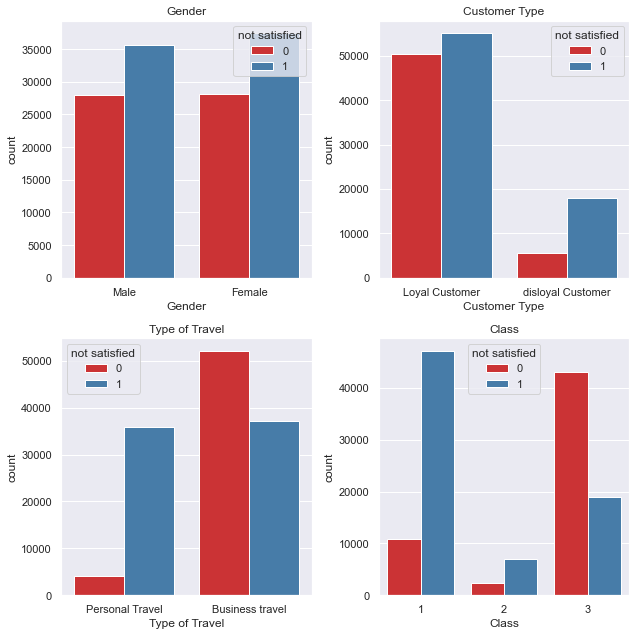

In [14]:
# Plot for categorical features
features = ["Gender", "Customer Type", "Type of Travel", "Class"]
plt.figure(figsize=(9, 9))
sns.set(palette="Set1")
plotnumber = 1

for feature in features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.countplot(x=feature, hue="not satisfied", data=df_eda)
    plt.xlabel(feature)
    plt.title(feature)
    plt.tight_layout()
    plotnumber += 1;

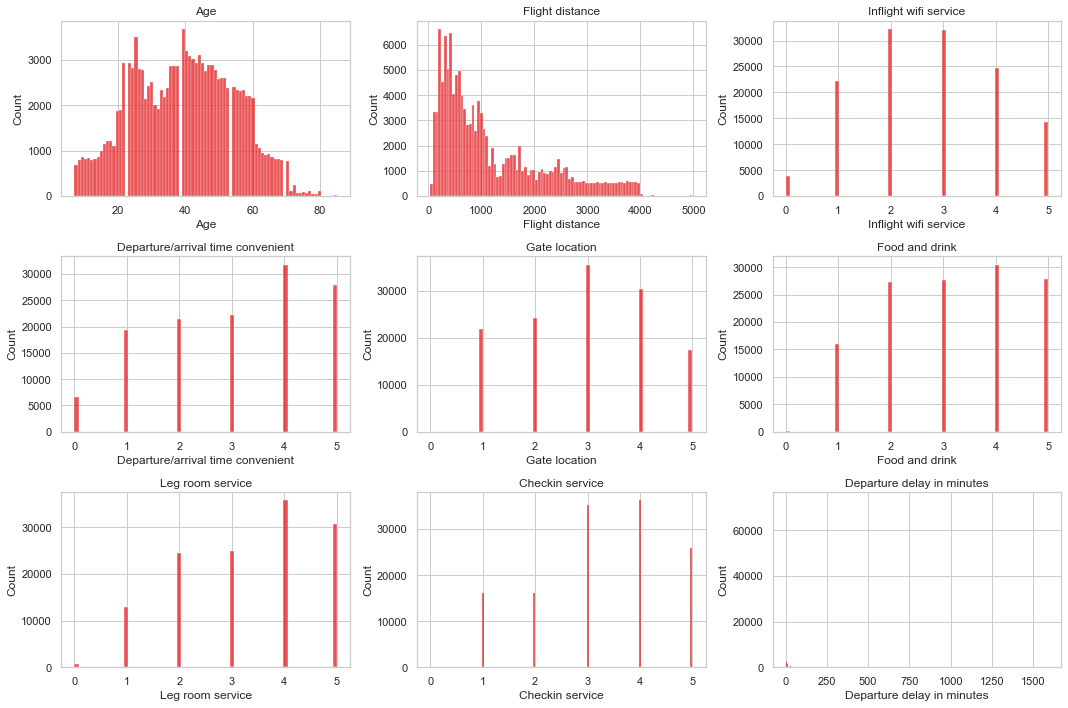

In [15]:
# Plot for numerical features
plt.figure(figsize=(15, 10), facecolor="white")
sns.set(style="whitegrid", palette="Set1")
plotnumber = 1
features = ["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
       "Gate location", "Food and drink", "Leg room service", "Checkin service", "Departure Delay in Minutes"]

for i in features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(x= i, data= df_eda)
    plt.xlabel(i.capitalize())
    plt.title(i.capitalize())
    plt.tight_layout()
    plotnumber += 1;

From above graphs, wifi service is clearly something that can be improved on, followed by gate location and perhaps food and drink.

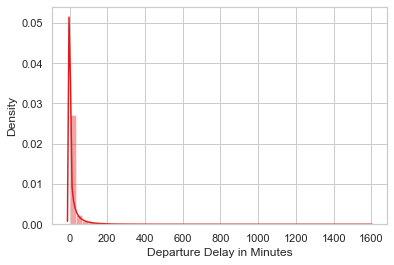

In [16]:
# Check Skewness on delay
sns.distplot(df_eda["Departure Delay in Minutes"]);

Delay is heavily skewed, which might impact the model, so we'll be cutting some outliers with careful consideration as to minimize data loss.

In [17]:
df_eda["Departure Delay in Minutes"].describe()

count    129342.000000
mean         14.646982
std          37.943984
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [18]:
# Data that have massive delay (more than 10 hours)
len(df_eda[df_eda["Departure Delay in Minutes"] >= 600].index)

25

In [19]:
# Dropping Outliers from Delay
df_eda.drop(df_eda[df_eda["Departure Delay in Minutes"] >= 600].index, inplace=True)

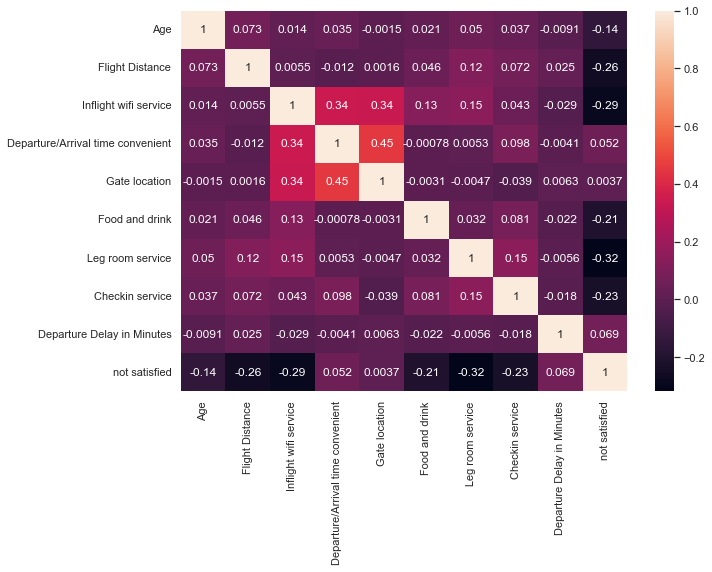

In [20]:
# Checking correlations between target variables and numerical features
plt.figure(figsize=(10,7))
sns.heatmap(df_eda[["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
       "Gate location", "Food and drink", "Leg room service", 
       "Checkin service", "Departure Delay in Minutes", "not satisfied"]].corr("spearman"), annot=True);

from heatmap above, customer might be dissatisfied because of the leg room service, wifi service, and checkin service, (also flight distance, but i believe it's not something we could easily improve on).

***
### **Modelling**

In [21]:
# Putting features into dependent and independent variables
X = df_eda[["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Gate location", "Food and drink", 
       "Leg room service", "Checkin service", "Departure Delay in Minutes", "Gender", "Customer Type", "Type of Travel", "Class"]]
y = df_eda[["not satisfied"]]

# Splitting back dataset for model training and testing to 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify=y,
    test_size = 0.2, 
    random_state = 42)

In [22]:
# Feature
to_scale = ["Age", "Flight Distance", "Departure Delay in Minutes"]
to_encode = ["Gender", "Customer Type", "Type of Travel"]
to_pass = ["Class", "Inflight wifi service", "Departure/Arrival time convenient", "Gate location", "Food and drink", 
       "Leg room service", "Checkin service"]

# Pre-Processor
ohe = OneHotEncoder(drop= "first")
scaler = RobustScaler()
ignore_cols = FunctionTransformer()

# Transformer
transformer = ColumnTransformer([("ohe", ohe, to_encode),
                                ("scale", scaler, to_scale),
                                ("pass", ignore_cols, to_pass)])

In [23]:
# Using Several Ensemble model to find the best metrics
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, verbosity=0)

# Define end-to-end pipeline
models = [rf, ada, gb, xgb]
score = []
mean_recall = []
mean_balanced_accuracy = []

for i in models:
    estimator = Pipeline([
        ("preprocessing", transformer),
        ("model", i)
    ])

    model_balanced_accuracy = cross_val_score(estimator, X_train, y_train, scoring= "balanced_accuracy", cv=5, error_score="raise", n_jobs=-1)
    model_recall = cross_val_score(estimator, X_train, y_train, cv=5, scoring="recall", error_score="raise", n_jobs=-1)
    
    mean_balanced_accuracy.append(model_balanced_accuracy.mean())
    mean_recall.append(model_recall.mean())
    

pd.DataFrame({
    "Model":["Random Forest"," AdaBoost", "GradientBoosting", "XGB"],
    "Recall": mean_recall,
    "Balanced Accuracy": mean_balanced_accuracy
})

,Model,Recall,Balanced Accuracy
0,Random Forest,0.964101,0.947116
1,AdaBoost,0.929314,0.909012
2,GradientBoosting,0.942921,0.927372
3,XGB,0.962050,0.948303


In [24]:
# Tuning Hyperparameter for our best model to get an even better metric score
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
estimator = Pipeline([("preprocessing", transformer), ("rf", rf)])

# Hyperparameter space
hyperparam_space = {
    "rf__max_depth": [3,5,10,15],
    "rf__n_estimators": [10,100,500,1000]
}

# Hyperparameter tuning
grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = hyperparam_space,
    cv = 5,
    scoring = "recall",
    return_train_score = True,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel']),
                                                                        ('scale',
                                                                         RobustScaler(),
                                                                       

In [25]:
# Our best model
print('Best score:', grid_search.best_score_)
print('Best params:', grid_search.best_params_)

Best score: 0.9627508728556681
Best params: {'rf__max_depth': 15, 'rf__n_estimators': 1000}


In [26]:
# Putting our best model into variable and re-fit the model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Check Metric result for train and test set to check for underfitting/ overfitting
y_train_pred = best_rf.predict(X_train)
print("Recall Train", recall_score(y_train, y_train_pred))
y_test_pred = best_rf.predict(X_test)
print("Recall Test", recall_score(y_test, y_test_pred))

Recall Train 0.9768026257307942
Recall Test 0.9636239316239317


In [27]:
# 
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     44955
           1       0.96      0.98      0.97     58498

    accuracy                           0.96    103453
   macro avg       0.96      0.96      0.96    103453
weighted avg       0.96      0.96      0.96    103453



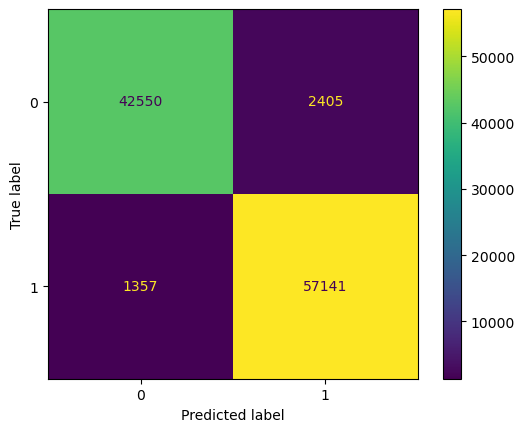

In [28]:
style.use("default")
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot();

In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     11239
           1       0.95      0.96      0.96     14625

    accuracy                           0.95     25864
   macro avg       0.95      0.95      0.95     25864
weighted avg       0.95      0.95      0.95     25864



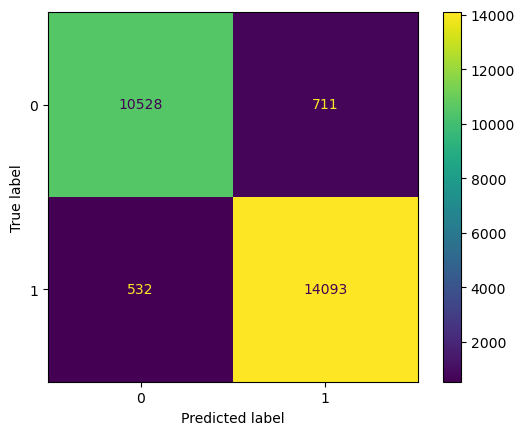

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot();

***
### **Conclusion & Recommendation**

More than half the passengers are not satisfied with their flight experience, as we've discovered, some of the things that might significantly impact their experience are ```wifi service``` and ```check in service```. 
- ```wifi service``` could be improved by providing a faster or more stable connection. Or to make it available in all class including eco class.
- ```check in service``` could be improved by easier online check in, to reduce queue time and possibility to aboard the plane late.

***